In [1]:
import limb
import pandas as pd
import math
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
gaitdata=pd.read_csv('Raw_gait_data_N1 set.csv', sep=',')

In [3]:
time=gaitdata.loc[:,"TIME"]

In [4]:
anthdat=limb.AnthroData(56.7,170)

In [5]:
ls=anthdat[8]
lt=anthdat[4]
lf=anthdat[12]
lcs=anthdat[9]
lct=anthdat[5]
lcf=anthdat[13]
If=anthdat[14]
Is=anthdat[10]
It=anthdat[6]
mf=anthdat[11]
ms=anthdat[7]
mt=anthdat[3]

In [6]:
Txp=gaitdata.loc[:,"Right metatarsal X"]
Typ=gaitdata.loc[:,"Right metatarsal Y"]
Axp=gaitdata.loc[:,"RIGHT ANKLE X"]
Ayp=gaitdata.loc[:,"RIGHT ANKLE Y"]
Kxp=gaitdata.loc[:,"Right knee X"]
Kyp=gaitdata.loc[:,"Right knee Y"]
Hxp=gaitdata.loc[:,"Right hip X"]
Hyp=gaitdata.loc[:,"Right hip Y"]

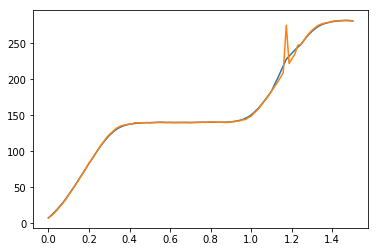

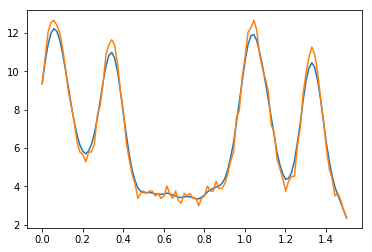

In [7]:
Tp=[limb.filterdata(Txp,5),limb.filterdata(Typ,4)]
plt.plot(time,Tp[0]),plt.plot(time,Txp)
plt.show()
plt.plot(time,Tp[1]),plt.plot(time,Typ)
plt.show()

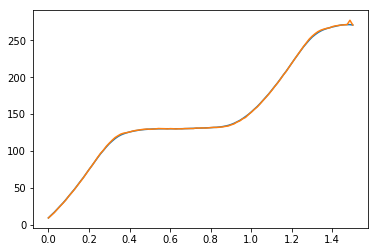

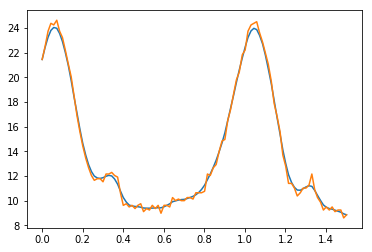

In [8]:
Ap=[limb.filterdata(Axp,5),limb.filterdata(Ayp,4)]
plt.plot(time,Ap[0]),plt.plot(time,Axp)
plt.show()
plt.plot(time,Ap[1]),plt.plot(time,Ayp)
plt.show()

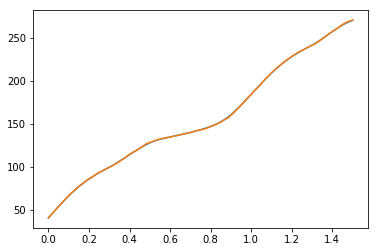

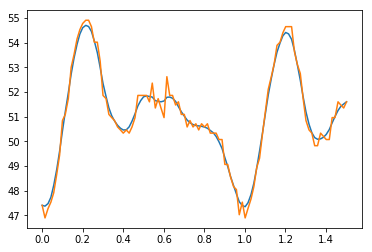

In [9]:
Kp=[limb.filterdata(Kxp,5),limb.filterdata(Kyp,4)]
plt.plot(time,Kp[0]),plt.plot(time,Kxp)
plt.show()
plt.plot(time,Kp[1]),plt.plot(time,Kyp)
plt.show()

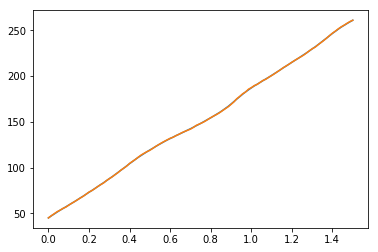

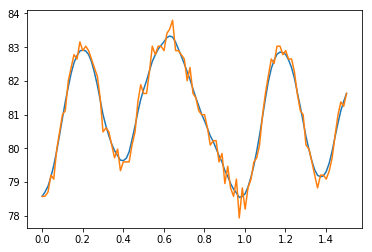

In [10]:
Hp=[limb.filterdata(Hxp,5),limb.filterdata(Hyp,4)]
plt.plot(time,Hp[0]),plt.plot(time,Hxp)
plt.show()
plt.plot(time,Hp[1]),plt.plot(time,Hyp)
plt.show()

In [11]:
Foot=limb.BodyPart(lf,mf,lcf,If,Tp,Ap)
Shank=limb.BodyPart(ls,ms,lcs,Is,Ap,Kp)
Thigh=limb.BodyPart(lt,mt,lct,It,Kp,Hp)
limb.BodyPart.time=time

In [12]:
GRFdata=pd.read_csv('Force plate data_N1 set.csv',sep=',')

In [13]:
Rx=GRFdata.loc[:,"RX"]
Ry=GRFdata.loc[:,"RY"]

In [14]:
Rx=limb.filterdata(Rx,2)
Ry=limb.filterdata(Ry,2)

The Inverse dynamics analysis is done by segmenting the body into foot, shank, thigh and the upper body is considered to be a lumped mass at the centre of mass of the upper body

*add the fbd of the whole body*

consider the foot

*add the fbd of the foot*

The kinetic diagram of the foot is as shown

*add kinetic diagram of the foot*

*add the equations here*

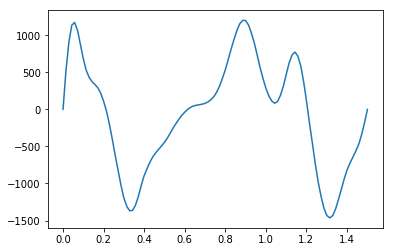

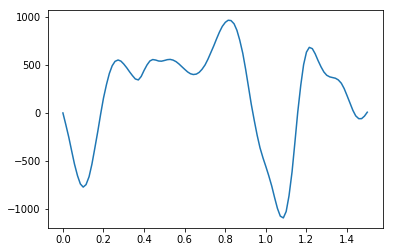

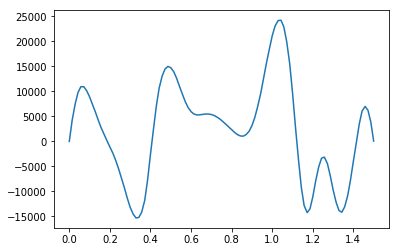

In [15]:
A,MA=Foot.Forces([Rx,Ry],np.zeros(106))
plt.plot(time,A[0])
plt.show()
plt.plot(time,A[1])
plt.show()
plt.plot(time,MA)
plt.show()

Consider the shank

*add FBD of shank*

*add kinetic diagram*

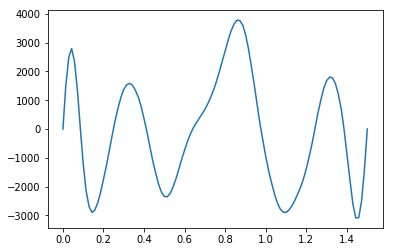

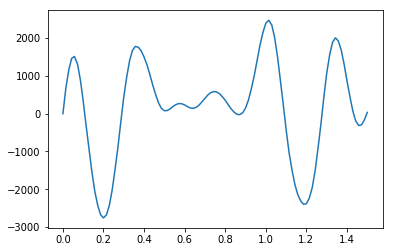

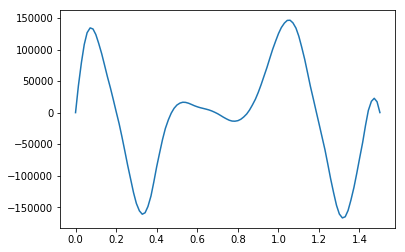

In [16]:
K,MK=Shank.Forces(A,MA)
plt.plot(time,K[0])
plt.show()
plt.plot(time,K[1])
plt.show()
plt.plot(time,MK)
plt.show()

consider the thigh

*add FBD of thigh*

*add kinetic diagram*

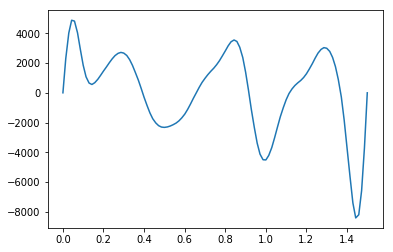

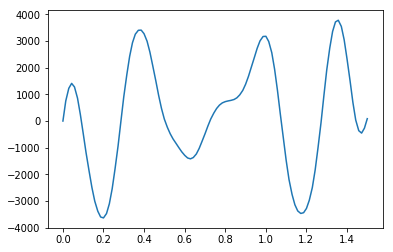

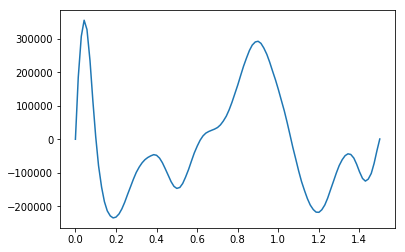

In [17]:
H,MH=Thigh.Forces(K,MK)
plt.plot(time,H[0])
plt.show()
plt.plot(time,H[1])
plt.show()
plt.plot(time,MH)
plt.show()

In [18]:
#filter the Joint forces and moments
#find the joint angles and joint omegas.

In [29]:
Power_A=limb.Power(Foot.omega,Shank.omega,MA)
Power_K=limb.Power(Shank.omega,Thigh.omega,MK)
power_H=limb.Power(Thigh.omega,np.zeros(106),MH)

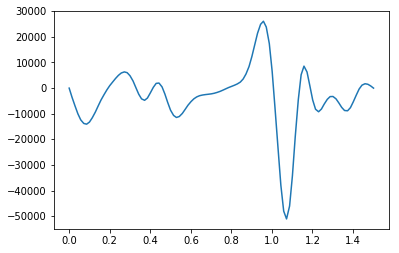

In [30]:
Power_A=limb.filterdata(Power_A,5)
plt.plot(time,Power_A)

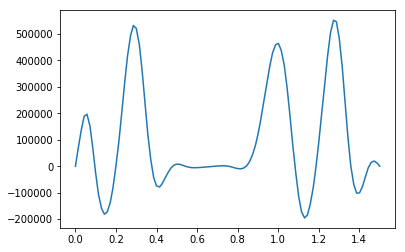

In [31]:
Power_K=limb.filterdata(Power_K,3)
plt.plot(time,Power_K)

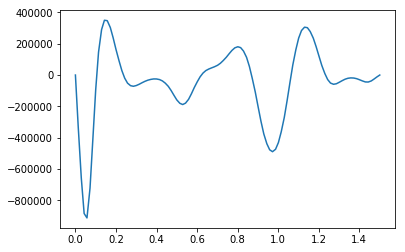

In [32]:
Power_H=limb.filterdata(power_H,3)
plt.plot(time,Power_H)